In [5]:
# from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Q 3.1 Load the data

In [6]:
import pandas as pd

# Load the datasets
labeled_data = pd.read_csv('Task2C_labeled.csv')
unlabeled_data = pd.read_csv('Task2C_unlabeled.csv')
test_data = pd.read_csv('Task2C_test.csv')

## Q 3.2 Train an autoencoder

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Combine labeled and unlabeled data for training the autoencoder
combined_data = pd.concat([labeled_data.drop('label', axis=1), unlabeled_data], ignore_index=True)

# Standardize the data
scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data)

# Define the range of neurons for the hidden layer
hidden_neurons = np.arange(20, 240, 40)

# Train an autoencoder for each number of hidden neurons
for neurons in hidden_neurons:
    print(f"Training autoencoder with {neurons} hidden neurons...")

    # Define the autoencoder model
    autoencoder = Sequential([
        Dense(neurons, activation='relu', input_shape=(combined_data_scaled.shape[1],)),  # Encoder layer
        Dense(combined_data_scaled.shape[1], activation='linear')  # Decoder layer (output layer)
    ])

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder
    autoencoder.fit(combined_data_scaled, combined_data_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    print(f"Autoencoder with {neurons} hidden neurons trained successfully.\n")


Training autoencoder with 20 hidden neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Autoencoder with 20 hidden neurons trained successfully.

Training autoencoder with 60 hidden neurons...
Autoencoder with 60 hidden neurons trained successfully.

Training autoencoder with 100 hidden neurons...
Autoencoder with 100 hidden neurons trained successfully.

Training autoencoder with 140 hidden neurons...
Autoencoder with 140 hidden neurons trained successfully.

Training autoencoder with 180 hidden neurons...
Autoencoder with 180 hidden neurons trained successfully.

Training autoencoder with 220 hidden neurons...
Autoencoder with 220 hidden neurons trained successfully.



## Q 3.3 Reconstruction Error

Training autoencoder with 20 hidden neurons...
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Reconstruction error for 20 hidden neurons: 0.6947833348204493

Training autoencoder with 60 hidden neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Reconstruction error for 60 hidden neurons: 0.5478341906573174

Training autoencoder with 100 hidden neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Reconstruction error for 100 hidden neurons: 0.46219558931718036

Training autoencoder with 140 hidden neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Reconstruction error for 140 hidden neurons: 0.40949018524287517

Training autoencoder with 180 hidden neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Reconstruction error for 180 hidden neurons: 0.37471711212110365

Training autoencoder with 220 hidden neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Reconstruction error for 220 hidden neurons: 0.3576747624779037



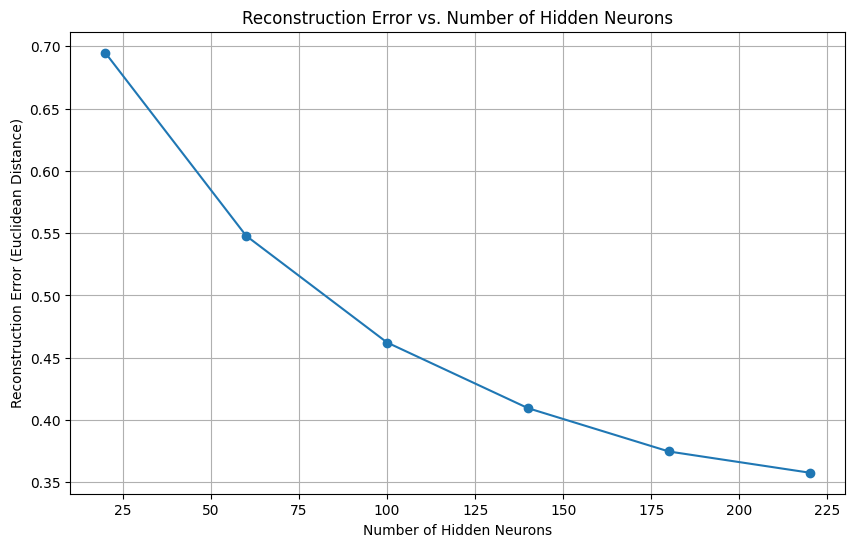

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# List to store reconstruction errors
reconstruction_errors = []

# Train an autoencoder for each number of hidden neurons and calculate the reconstruction error
for neurons in hidden_neurons:
    print(f"Training autoencoder with {neurons} hidden neurons...")

    # Define the autoencoder model
    autoencoder = Sequential([
        Dense(neurons, activation='relu', input_shape=(combined_data_scaled.shape[1],)),  # Encoder layer
        Dense(combined_data_scaled.shape[1], activation='linear')  # Decoder layer (output layer)
    ])

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder
    autoencoder.fit(combined_data_scaled, combined_data_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Predict the output (reconstructed data)
    reconstructed_data = autoencoder.predict(combined_data_scaled)

    # Calculate the average Euclidean distance (reconstruction error) between the input and reconstructed data
    mse = mean_squared_error(combined_data_scaled, reconstructed_data)
    reconstruction_error = np.sqrt(mse)  # Square root of MSE for Euclidean distance
    reconstruction_errors.append(reconstruction_error)

    print(f"Reconstruction error for {neurons} hidden neurons: {reconstruction_error}\n")

# Plot the reconstruction error
plt.figure(figsize=(10, 6))
plt.plot(hidden_neurons, reconstruction_errors, marker='o')
plt.title("Reconstruction Error vs. Number of Hidden Neurons")
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Reconstruction Error (Euclidean Distance)")
plt.grid(True)
plt.show()


Decreasing Reconstruction Error:
The plot shows a clear downward trend in the reconstruction error as the number of hidden neurons increases.
When the hidden layer has a smaller number of neurons (e.g., 20), the reconstruction error is relatively high (around 0.7).
As the number of neurons in the hidden layer increases, the reconstruction error consistently decreases, reaching a lower value (around 0.35) when the hidden layer size is at its maximum (220 neurons).

Although the reconstruction error decreases as the number of hidden neurons increases, the rate of improvement might slow down as we continue to add more neurons.

However, the trend suggests that at some point, adding more neurons may not lead to substantial improvements in reconstruction quality.
It's essential to balance the model complexity with the need for accurate reconstructions to avoid overfitting or making the model unnecessarily large.

## Q 3.4 3-layer NN for classification

Training 3-layer neural network with 20 hidden neurons...
Test error for 20 hidden neurons: 0.508

Training 3-layer neural network with 60 hidden neurons...
Test error for 60 hidden neurons: 0.46399999999999997

Training 3-layer neural network with 100 hidden neurons...
Test error for 100 hidden neurons: 0.41400000000000003

Training 3-layer neural network with 140 hidden neurons...
Test error for 140 hidden neurons: 0.42000000000000004

Training 3-layer neural network with 180 hidden neurons...
Test error for 180 hidden neurons: 0.46399999999999997

Training 3-layer neural network with 220 hidden neurons...
Test error for 220 hidden neurons: 0.476



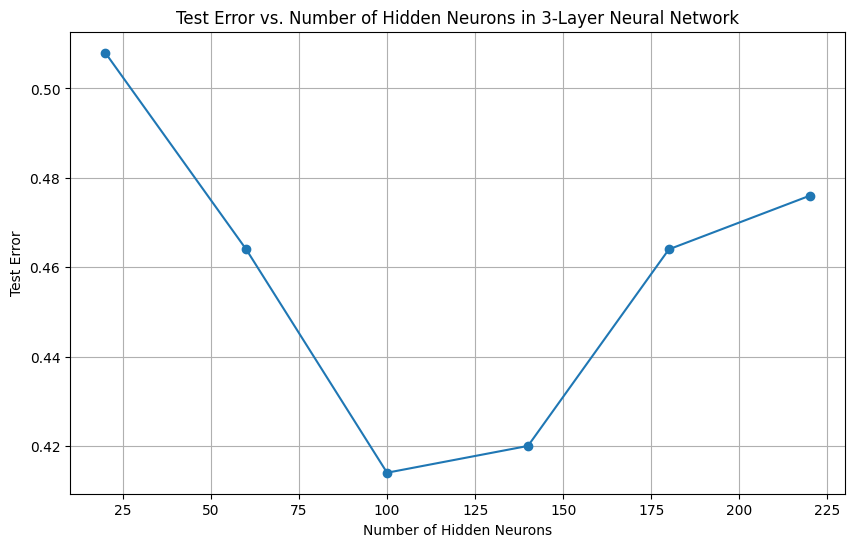

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Separate features and labels from the labeled training data and the test data
X_train = labeled_data.drop('label', axis=1).values
y_train = labeled_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of neurons for the hidden layer
hidden_neurons = np.arange(20, 240, 40)

# List to store test errors
test_errors = []

# Train a 3-layer neural network for each number of hidden neurons and calculate the test error
for neurons in hidden_neurons:
    print(f"Training 3-layer neural network with {neurons} hidden neurons...")

    # Define the 3-layer neural network model with three hidden layers, each with the specified number of neurons
    model = MLPClassifier(hidden_layer_sizes=(neurons, neurons, neurons), learning_rate_init=0.01, max_iter=1000, random_state=42)

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Calculate the test error (1 - accuracy)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(test_error)

    print(f"Test error for {neurons} hidden neurons: {test_error}\n")

# Plot the test errors for different numbers of hidden neurons
plt.figure(figsize=(10, 6))
plt.plot(hidden_neurons, test_errors, marker='o')
plt.title("Test Error vs. Number of Hidden Neurons in 3-Layer Neural Network")
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Test Error")
plt.grid(True)
plt.show()


The plot shows that the test error decreases initially as the number of hidden neurons increases from 25 to 100, reaching a minimum around 100 hidden neurons.
However, after reaching this optimal point, the test error begins to increase as the number of hidden neurons continues to grow beyond 100.

As the number of neurons in the hidden layer increases beyond 100, the test error starts to rise. This trend indicates that adding more neurons might lead to overfitting, where the model becomes too complex and starts to memorize the training data instead of generalizing well to new data.


## Q 3.5 Build augmented self-taught networks

Training autoencoder and 3-layer neural network with 20 neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test error for augmented model with 20 hidden neurons: 0.476

Training autoencoder and 3-layer neural network with 60 neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test error for augmented model with 60 hidden neurons: 0.45199999999999996

Training autoencoder and 3-layer neural network with 100 neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test error for augmented model with 100 hidden neurons: 0.478

Training autoencoder and 3-layer neural network with 140 neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test error for augmented model with 140 hidden neurons: 0.49

Training autoencoder and 3-layer neural network with 180 neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test error for augmented model with 180 hidden neurons: 0.516

Training autoencoder and 3-layer neural network with 220 neurons...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test error for augmented model with 220 hidden neurons: 0.55



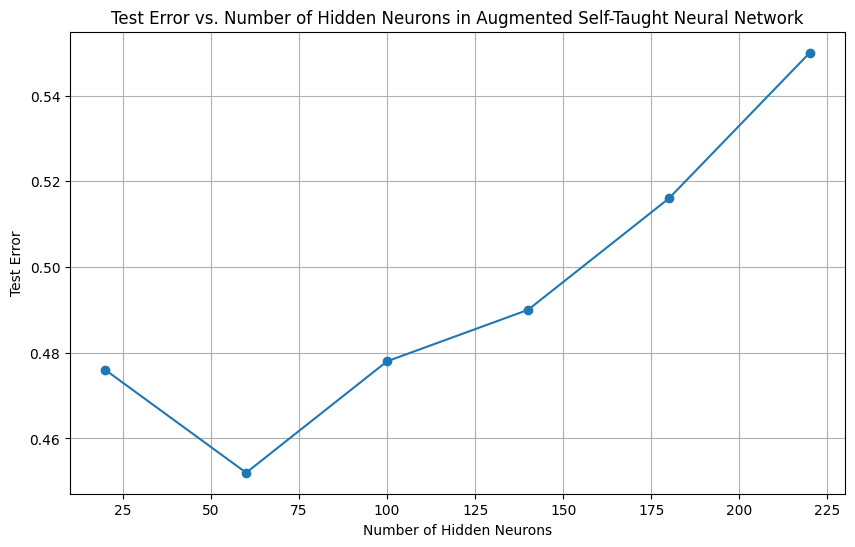

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# List to store test errors for augmented models
augmented_test_errors = []

# Loop through the hidden neurons configuration for the autoencoder and neural network
for neurons in hidden_neurons:
    print(f"Training autoencoder and 3-layer neural network with {neurons} neurons...")

    # Step 1: Train the autoencoder and extract the middle layer features
    autoencoder = Sequential([
        Dense(neurons, activation='relu', input_shape=(combined_data_scaled.shape[1],)),  # Encoder layer
        Dense(combined_data_scaled.shape[1], activation='linear')  # Decoder layer (output layer)
    ])

    # Compile and train the autoencoder
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    autoencoder.fit(combined_data_scaled, combined_data_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Create a new model to extract the output from the encoder layer (the extra features)
    encoder = Sequential([autoencoder.layers[0]])  # Extracting the encoder layer
    encoder_output = encoder.predict(scaler.transform(labeled_data.drop('label', axis=1).values))

    # Step 2: Augment the original feature set with the extra features from the autoencoder
    augmented_X_train = np.hstack((X_train_scaled, encoder_output))
    encoder_output_test = encoder.predict(X_test_scaled)
    augmented_X_test = np.hstack((X_test_scaled, encoder_output_test))

    # Step 3: Train the augmented 3-layer neural network with the combined features
    augmented_model = MLPClassifier(hidden_layer_sizes=(neurons, neurons, neurons), learning_rate_init=0.01, max_iter=1000, random_state=42)
    augmented_model.fit(augmented_X_train, y_train)

    # Predict on the augmented test data
    augmented_y_pred = augmented_model.predict(augmented_X_test)

    # Calculate the test error for the augmented model
    augmented_test_error = 1 - accuracy_score(y_test, augmented_y_pred)
    augmented_test_errors.append(augmented_test_error)

    print(f"Test error for augmented model with {neurons} hidden neurons: {augmented_test_error}\n")

# Plot the test errors for different numbers of hidden neurons in the augmented models
plt.figure(figsize=(10, 6))
plt.plot(hidden_neurons, augmented_test_errors, marker='o')
plt.title("Test Error vs. Number of Hidden Neurons in Augmented Self-Taught Neural Network")
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Test Error")
plt.grid(True)
plt.show()


## Q 3.6 Plot the error rates for the 3-layer neural networks and the augmented selftaught networks

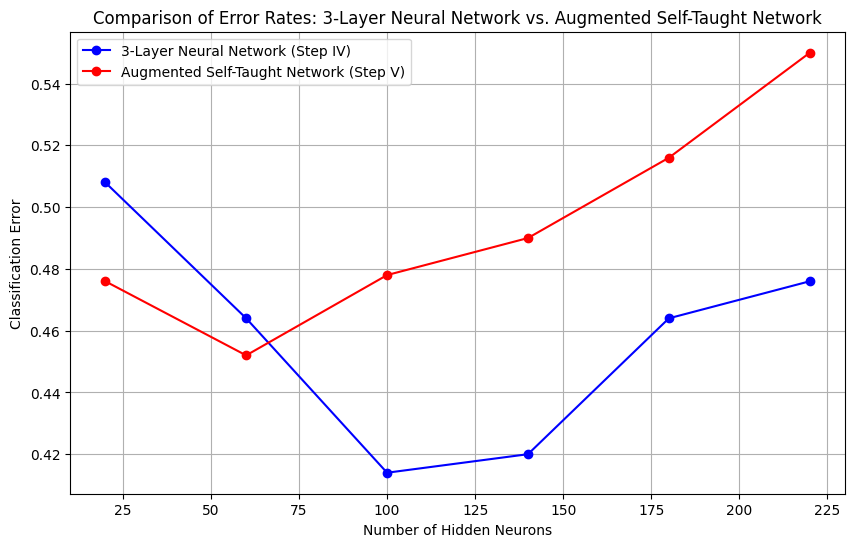

In [11]:
import matplotlib.pyplot as plt

# Plot the error rates for the 3-layer neural networks from Step IV and the augmented self-taught networks from Step V
plt.figure(figsize=(10, 6))

# Plot the test errors for the 3-layer neural networks (Step IV)
plt.plot(hidden_neurons, test_errors, marker='o', label='3-Layer Neural Network (Step IV)', color='blue')

# Plot the test errors for the augmented self-taught networks (Step V)
plt.plot(hidden_neurons, augmented_test_errors, marker='o', label='Augmented Self-Taught Network (Step V)', color='red')

# Add titles and labels
plt.title("Comparison of Error Rates: 3-Layer Neural Network vs. Augmented Self-Taught Network")
plt.xlabel("Number of Hidden Neurons")
plt.ylabel("Classification Error")
plt.grid(True)
plt.legend()
plt.show()


Model Complexity:

The complexity of the augmented self-taught network grows faster than that of the 3-layer neural network due to the additional input dimensions provided by the autoencoder features. This complexity might lead to instability and higher error rates as the network's capacity to model intricate patterns exceeds the data's actual complexity.

The augmented self-taught network is more prone to overfitting as the number of neurons increases, especially because it uses a larger feature set (original features + autoencoder features). This increased feature space makes the model susceptible to memorizing the training data rather than learning general patterns.
In contrast, the standard 3-layer neural network, which relies only on the original features, shows a more stable performance across different neuron counts. This indicates that the simpler model is less likely to overfit, even with increased hidden layers.

The autoencoder-generated features may initially help capture additional patterns in the data, leading to a performance improvement for the augmented self-taught network when the number of hidden neurons is low (20 to 60).
However, as the model becomes more complex, these extra features might introduce noise or irrelevant information, leading to worse performance compared to the standard 3-layer neural network.

**Conclusion :**

For lower numbers of neurons (20 to 60), the augmented self-taught network benefits from the additional features generated by the autoencoder, resulting in lower error rates compared to the standard 3-layer neural network.
For higher numbers of neurons (100 and above), the performance of the augmented self-taught network worsens significantly due to overfitting and the introduction of potentially noisy or irrelevant features from the autoencoder.